# Transport Preference Analysis Project

## Problem Statement

### Context:

You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose, you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’, you are required to predict the preferred mode of transport.

### Objective:

The project requires you to build several Machine Learning models and compare them so that the model can be finalised to predict the preffered mode of transport


### Data Description

Age: Age of the Employee in Years

Gender: Gender of the Employee

Engineer: For Engineer =1 , Non Engineer =0

MBA: For MBA =1 , Non-MBA =0

Work Exp: Experience in years

Salary: Salary in Lakhs per Annum

Distance: Distance in km from Home to Office

license: If Employee has Driving Licence -1, If not, then 0

Transport: Mode of Transport

## **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing necessary libraries

In [65]:
!pip install xgboost

In [136]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [139]:
trans = pd.read_csv(r'C:\Users\admin\Desktop\Aaryani\Great Learning\6th Month\Extended Project\Transport.csv') ##  Fill the blank to read the data

In [141]:
# copying data to another variable to avoid any changes to original data
data = trans.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [16]:
data.head() ##  Complete the code to view top 5 rows of the data

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [18]:
data.tail() ##  Complete the code to view last 5 rows of the data

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport
443,39,Male,1,1,21,50.0,23.4,1,Private Transport


#### Understand the shape of the dataset

In [20]:
data.shape ##  Complete the code to view dimensions of the data

(444, 9)

#### Check the data types of the columns for the dataset

In [23]:
data.info() ## Complete the code to data type of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [25]:
# checking for duplicate values
data.duplicated().sum()

0

- There are no duplicate values in the data.

## Exploratory Data Analysis

#### Let's check the statistical summary of the data

In [10]:
data.describe(include='all').T ##  Complete the code to print the statistical summary of the data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,444.0,NaN,NaN,NaN,27.747748,4.41671,18.0,25.0,27.0,30.0,43.0
Gender,444,2,Male,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engineer,444.0,NaN,NaN,NaN,0.754505,0.430866,0.0,1.0,1.0,1.0,1.0
MBA,444.0,NaN,NaN,NaN,0.252252,0.434795,0.0,0.0,0.0,1.0,1.0
Work Exp,444.0,NaN,NaN,NaN,6.29955,5.112098,0.0,3.0,5.0,8.0,24.0
Salary,444.0,NaN,NaN,NaN,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,NaN,NaN,NaN,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,NaN,NaN,NaN,0.234234,0.423997,0.0,0.0,0.0,0.0,1.0
Transport,444,2,Public Transport,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Let's check the count of each unique category in each of the categorical variables

In [11]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Gender
Male      316
Female    128
Name: count, dtype: int64
--------------------------------------------------
Transport
Public Transport     300
Private Transport    144
Name: count, dtype: int64
--------------------------------------------------


### Univariate Analysis

In [27]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on age

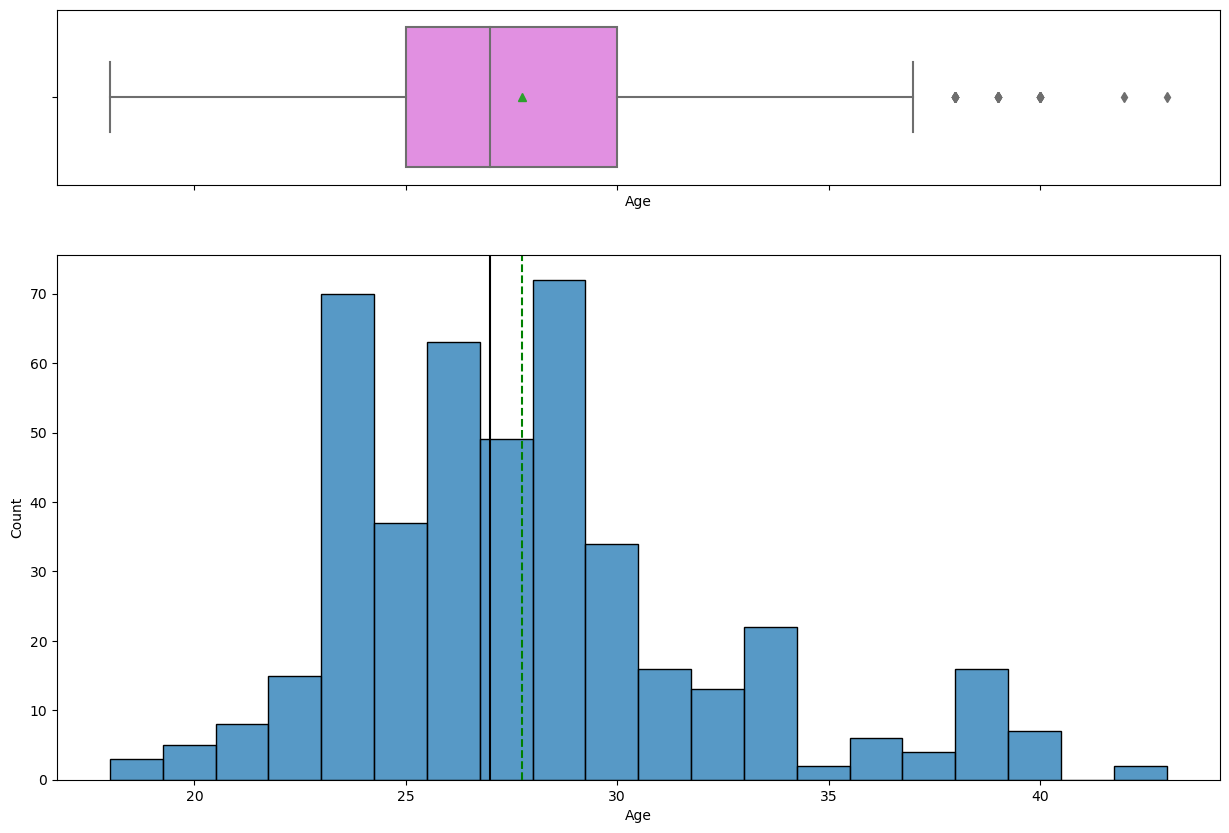

In [13]:
histogram_boxplot(data, "Age")

* The distribution of the age is right skewed


#### Observations on work experience

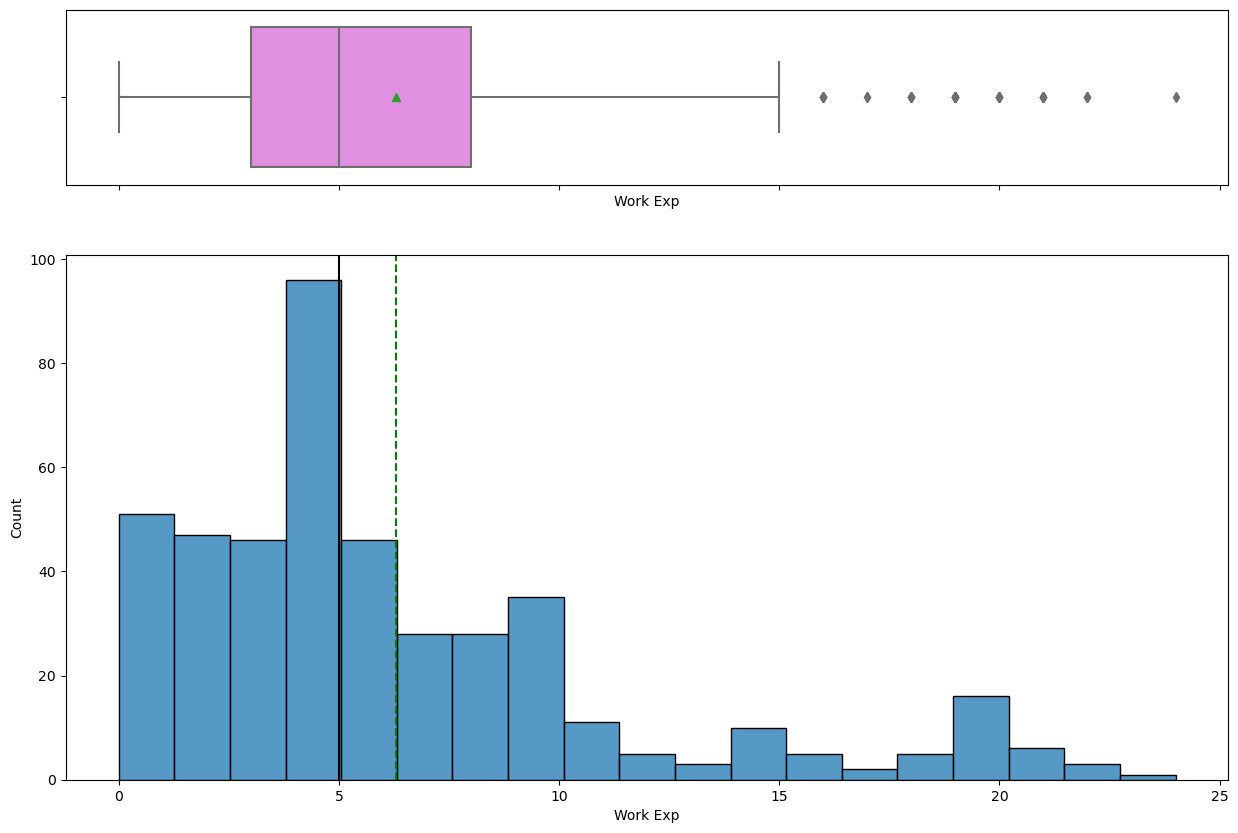

In [14]:
histogram_boxplot(data, 'Work Exp')

In [29]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Gender

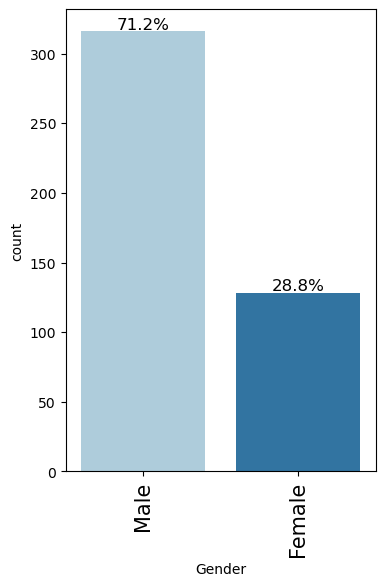

In [16]:
labeled_barplot(data, "Gender", perc=True)

#### Observations on Transport preferred

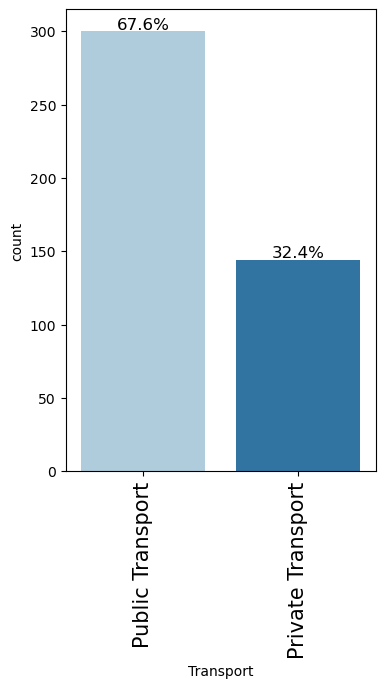

In [31]:
labeled_barplot(data, "Transport", perc=True)

#### Observations on Transport preferred

### Bivariate Analysis

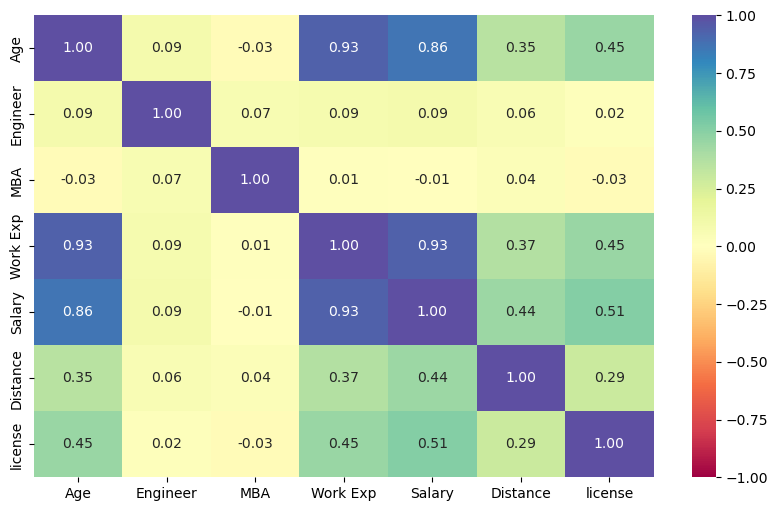

In [18]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 6))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Creating functions that will help us with further analysis.**

In [88]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [90]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Let's find out if Gender  has any impact on Transport Preference

Transport  Private Transport  Public Transport  All
Gender                                             
All                      144               300  444
Male                      93               223  316
Female                    51                77  128
------------------------------------------------------------------------------------------------------------------------


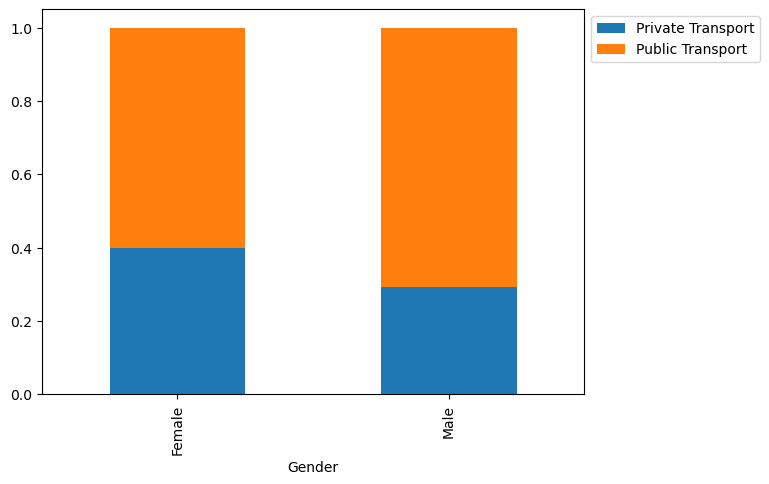

In [21]:
stacked_barplot(data, 'Gender', 'Transport')

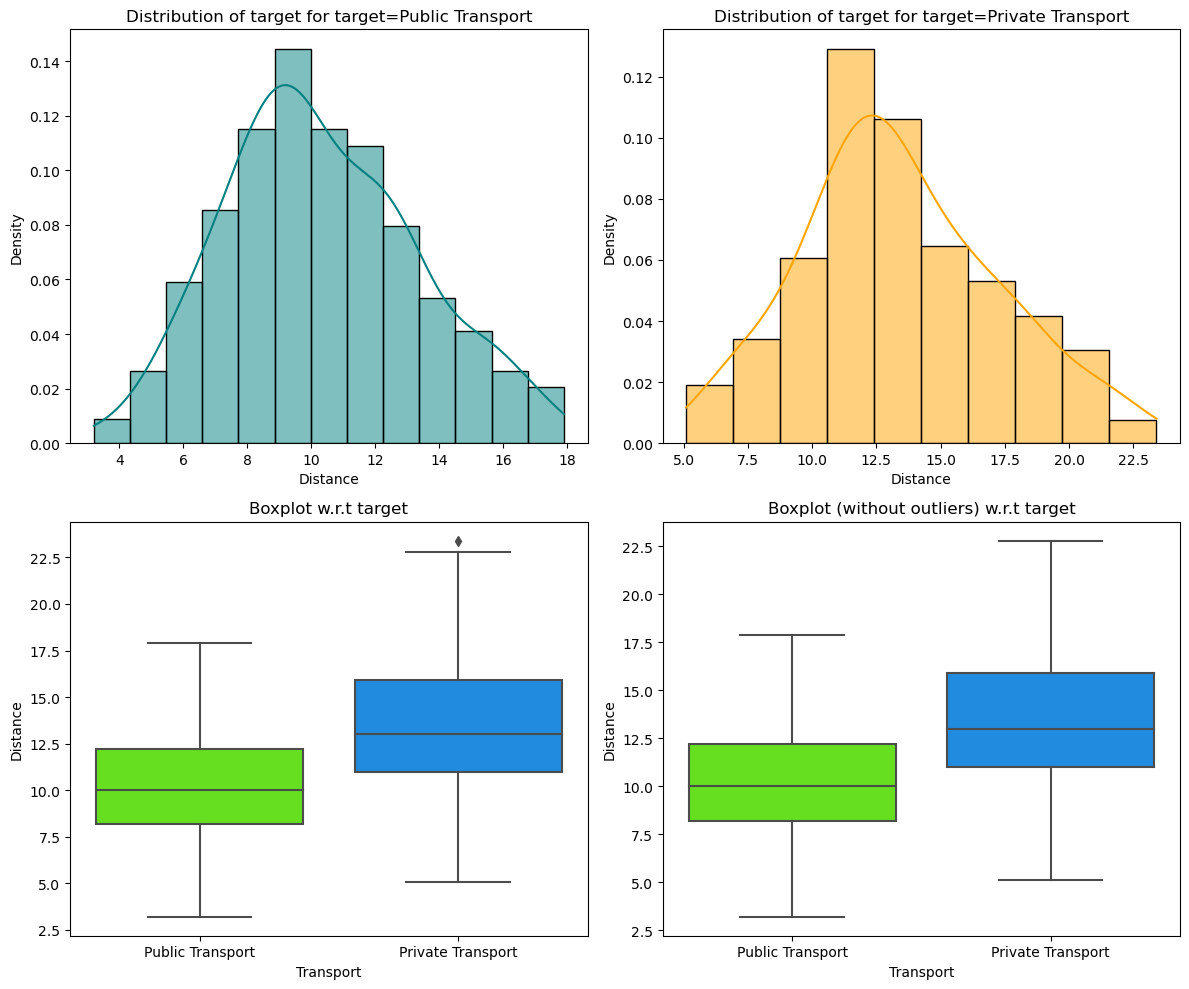

In [98]:
distribution_plot_wrt_target(data, 'Distance', 'Transport')

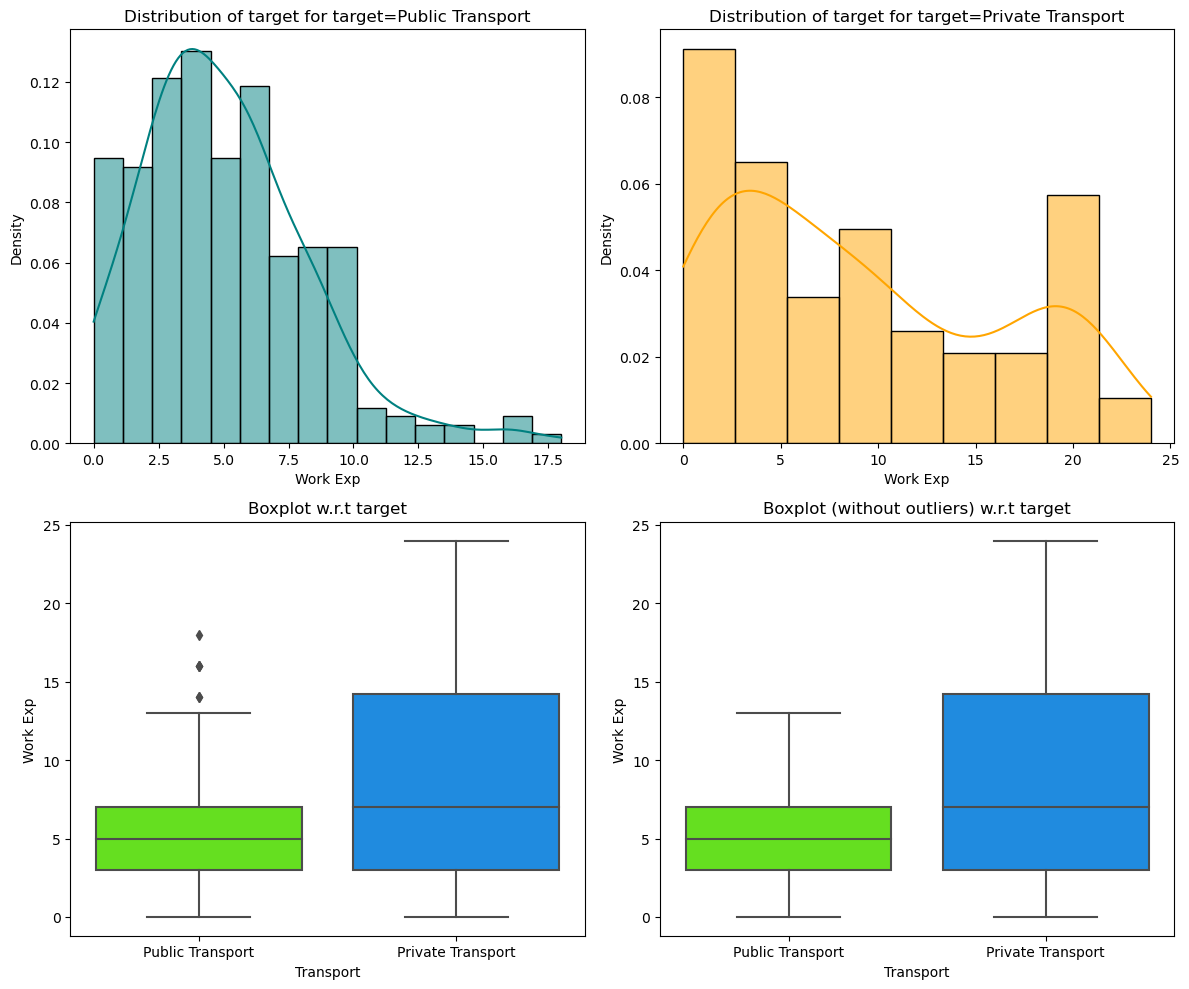

In [104]:
distribution_plot_wrt_target(data, 'Work Exp', 'Transport')

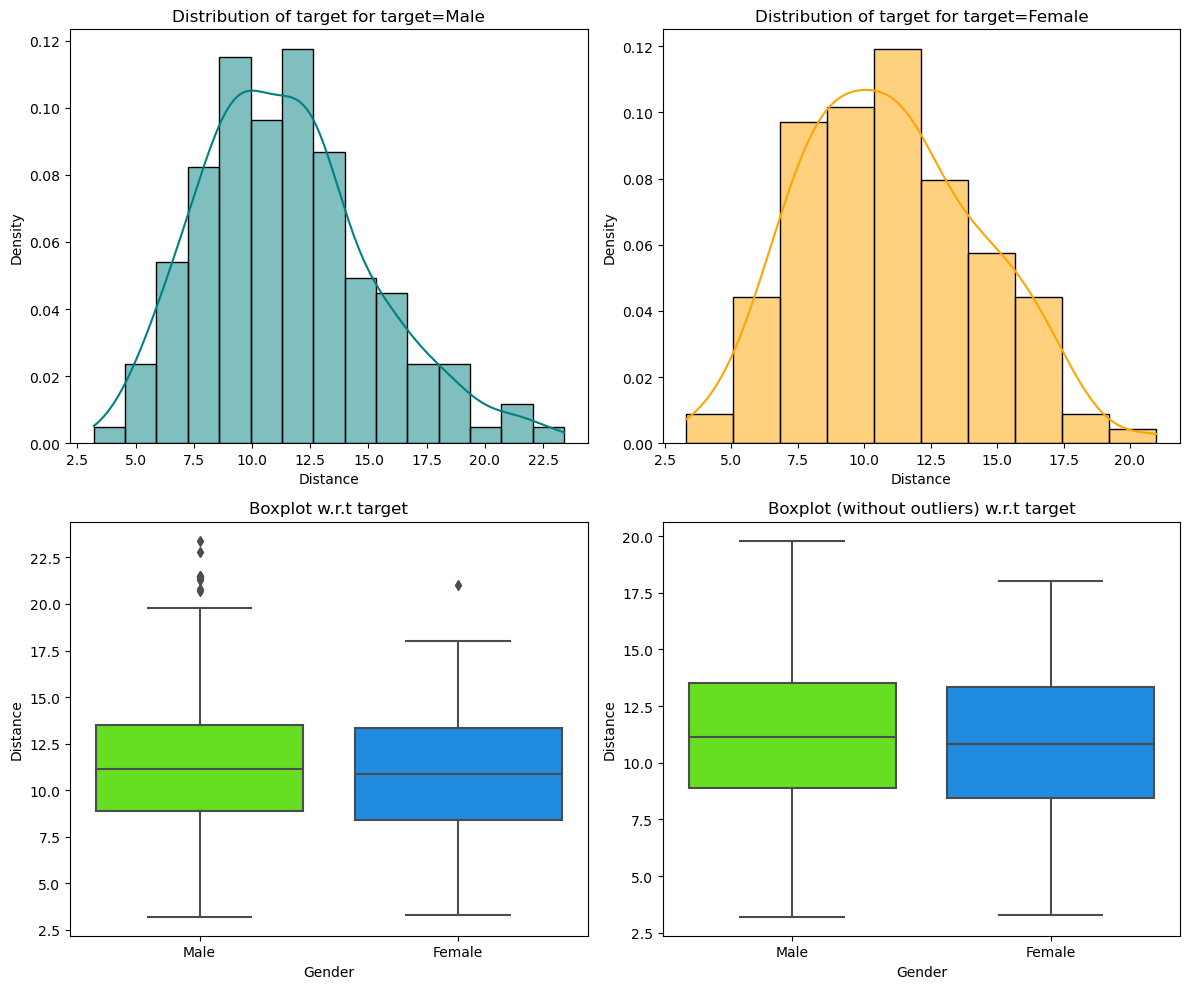

In [102]:
distribution_plot_wrt_target(data, 'Distance', 'Gender')

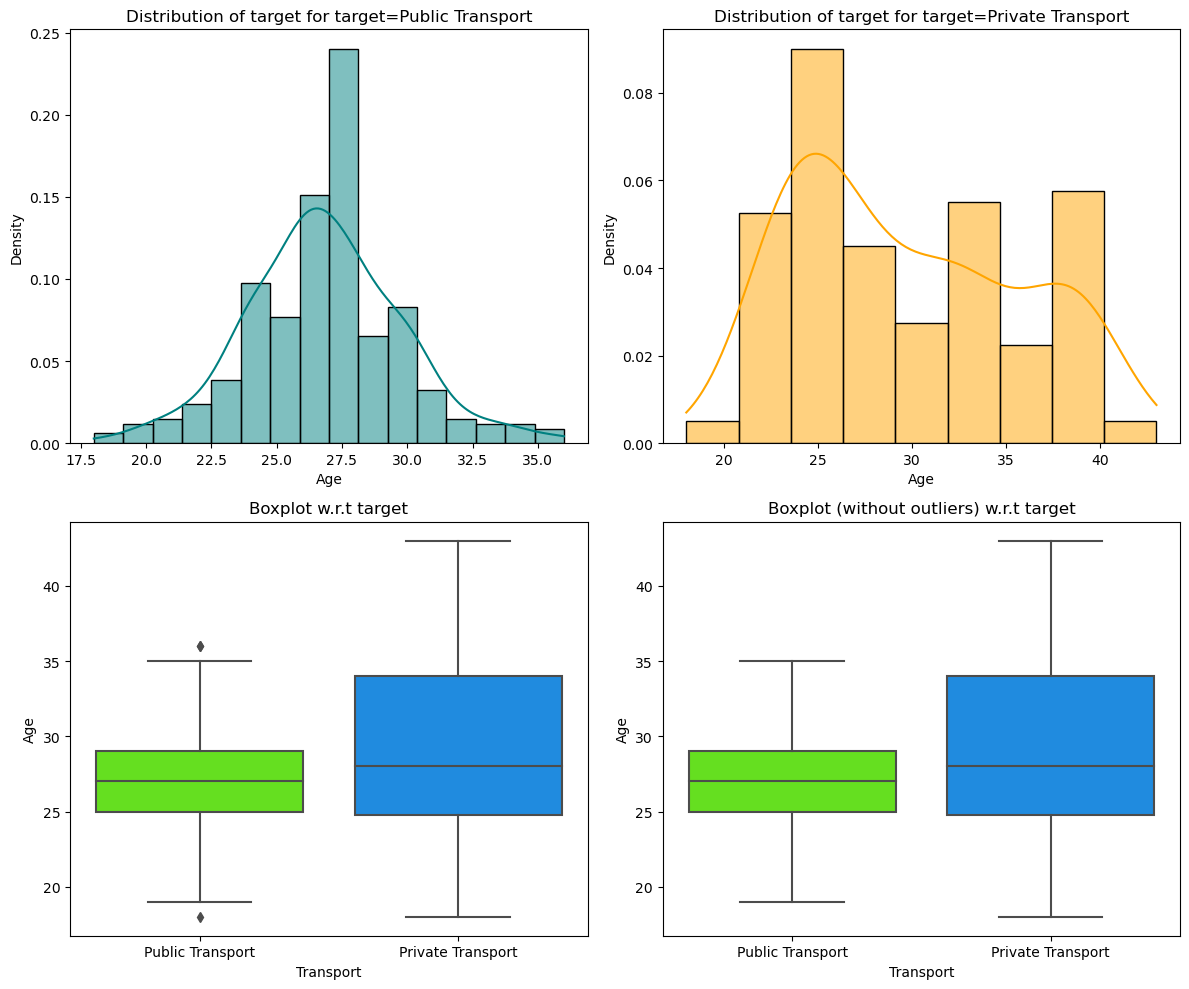

In [106]:
distribution_plot_wrt_target(data, 'Age', 'Transport')

Checking if the Work Experience  of the employee has any relation with preference of the transport

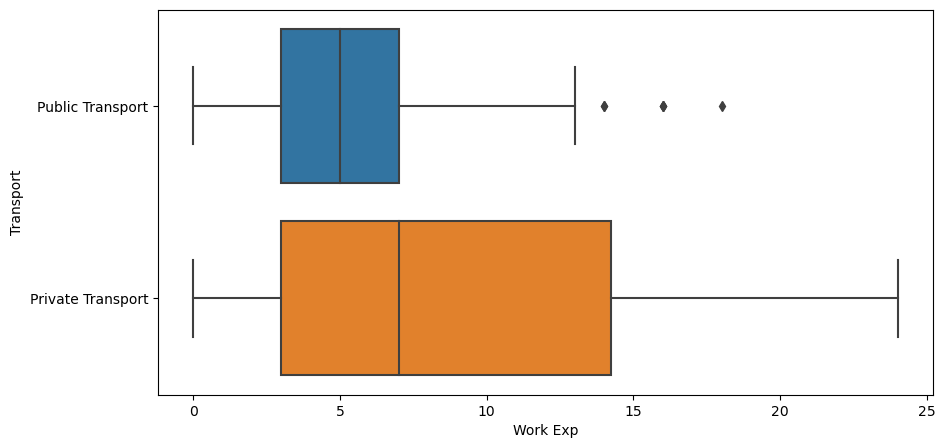

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Work Exp", y="Transport")
plt.show()

#### Checking if the Age of the employee has any relation with preference of the Transport

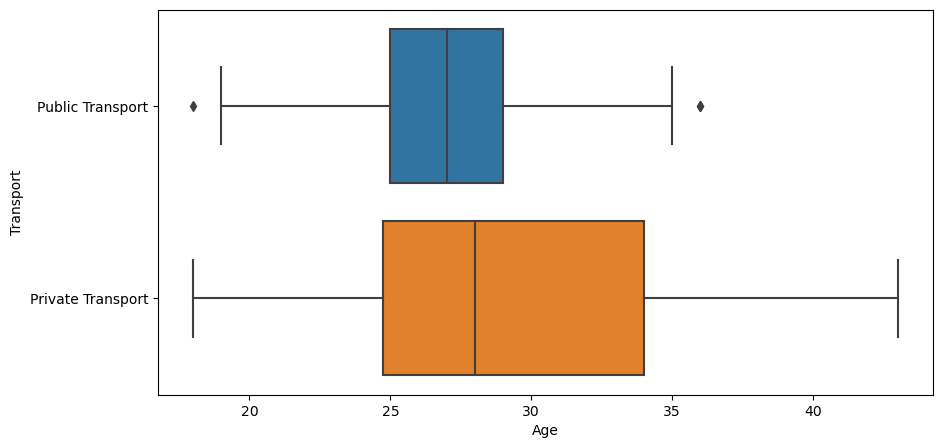

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Age', y='Transport')
plt.show()

## Data Pre-processing

### Outlier Check

- Let's check for outliers in the data.

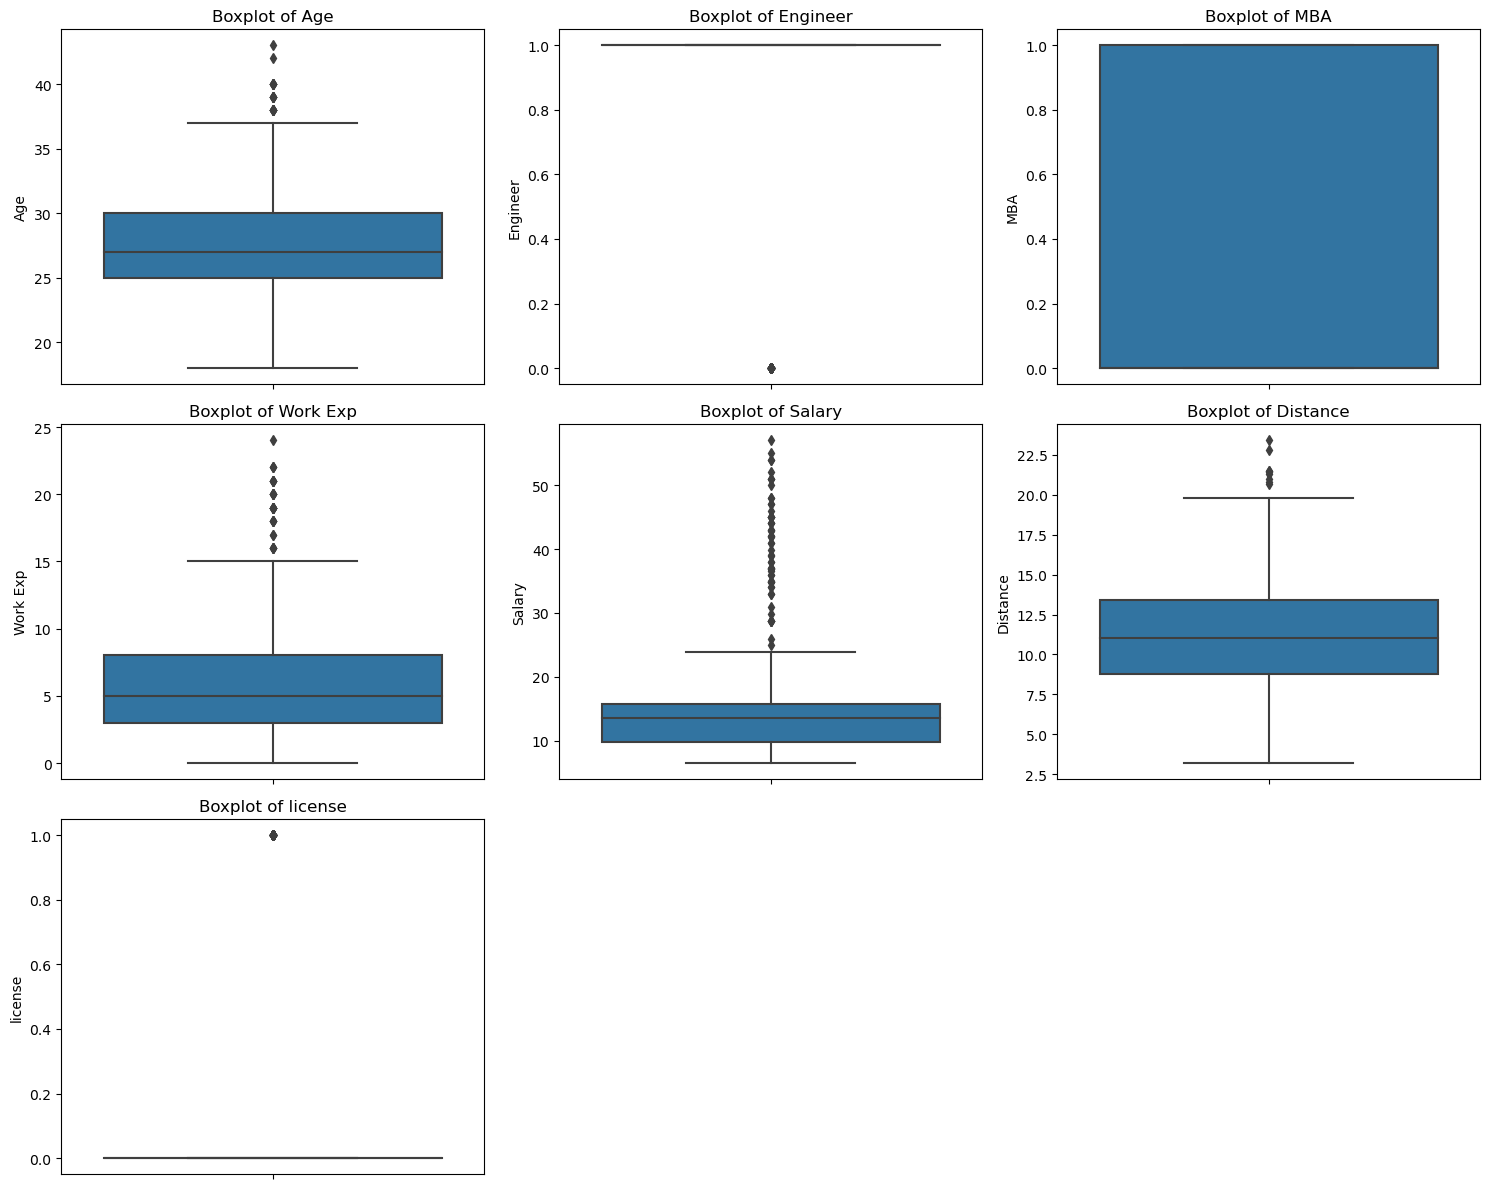

In [143]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = data[numeric_columns[i]], data = data)
    plt.title('Boxplot of {}'.format(numeric_columns[i]))
    plt.tight_layout() ## Complete the code to create boxplots for all the numeric columns

plt.show()

In [144]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [145]:
#Cap & floor the values beyond the outlier boundaries
for i in numeric_columns:
    LL, UL = remove_outlier(data[i])
    data[i] = np.where(data[i] > UL, UL, data[i])
    data[i] = np.where(data[i] < LL, LL, data[i])

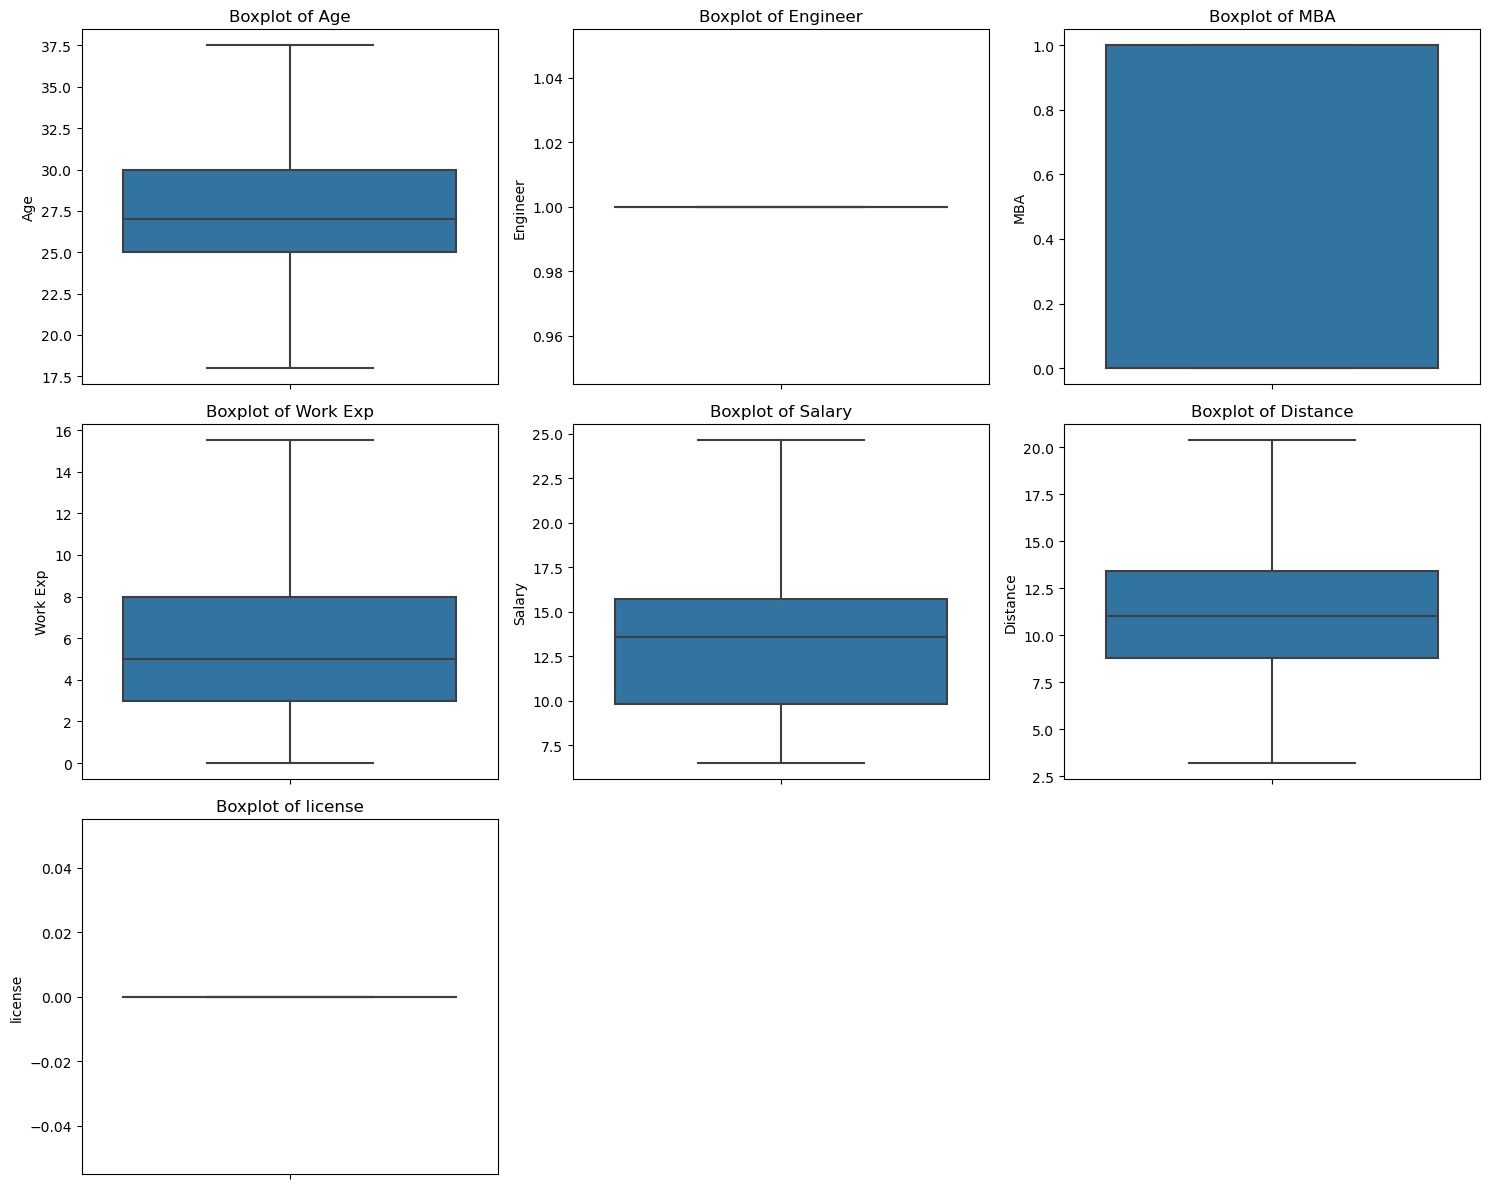

In [146]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = data[numeric_columns[i]], data = data)
    plt.title('Boxplot of {}'.format(numeric_columns[i]))
    plt.tight_layout() ## Complete the code to create boxplots for all the numeric columns

plt.show()

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [151]:
data["Gender"] = data["Gender"].apply(lambda x: 1 if x == "Male" else 0) # encode the object type of data into numerical
data["Transport"]= data["Transport"].apply(lambda x: 1 if x == "Public Transport" else 0) # encode the object type of data into numerical

X = data.drop("Transport",axis=1) ## Complete the code to drop Transport from the data
Y = data["Transport"]


X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, test_size=0.30, random_state=1, stratify=Y
)

In [153]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (310, 8)
Shape of test set :  (134, 8)
Percentage of classes in training set:
Transport
1    0.674194
0    0.325806
Name: proportion, dtype: float64
Percentage of classes in test set:
Transport
1    0.679104
0    0.320896
Name: proportion, dtype: float64


In [155]:
X_train.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
296,30.0,1,1.0,1.0,8.0,14.7000,12.6,0.0
404,31.0,1,1.0,0.0,8.0,15.9000,16.4,0.0
84,30.0,0,1.0,0.0,8.0,14.6000,8.1,0.0
424,37.5,1,1.0,0.0,15.5,24.6125,18.1,0.0
432,33.0,1,1.0,1.0,10.0,17.0000,19.1,0.0


In [157]:
X_test.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
152,26.0,1,1.0,0.0,2.0,9.6000,9.5,0.0
6,28.0,1,1.0,0.0,5.0,14.4000,5.1,0.0
109,24.0,1,1.0,0.0,6.0,12.7000,8.7,0.0
434,37.5,1,1.0,0.0,15.5,24.6125,19.8,0.0
367,32.0,0,1.0,1.0,10.0,15.8000,14.6,0.0


## Model evaluation criterion

**Model can make wrong predictions as**:

1. Model predicts that the Public mode of transport is preffered but employee prefers private mode
2. Model predicts that that the Private mode of transport is preffered but employee prefers public mode

**Which case is more important?**

Both are important to correctly estimate the number of employees preffering the private transport

**How to reduce the losses?**

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [159]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [161]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [174]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train) ## Complete the code to fit bagging classifier on the train data

BaggingClassifier(random_state=1)

#### Checking model performance on training set

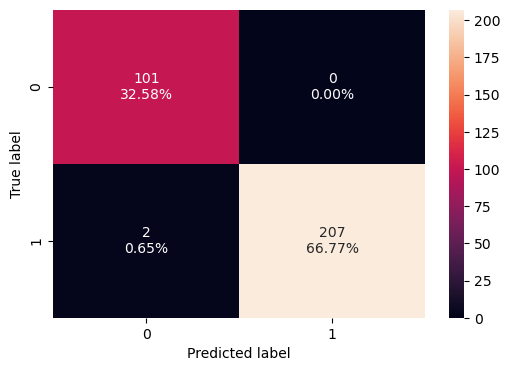

In [177]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [178]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.993548,0.990431,1.0,0.995192


#### Checking model performance on test set

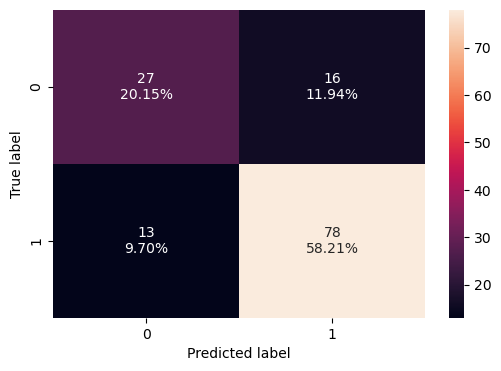

In [182]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [183]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn( bagging_classifier, X_test, y_test) ## Complete the code to check performance for test data
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.783582,0.857143,0.829787,0.843243


### Hyperparameter Tuning - Bagging Classifier

In [187]:
%%time
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5,0.7,1],
    "n_estimators": np.arange(50,110,25),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

CPU times: total: 33.4 s
Wall time: 35.2 s


BaggingClassifier(max_features=0.5, max_samples=0.8, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

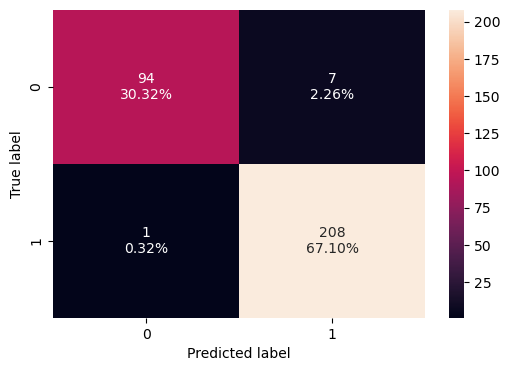

In [189]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [190]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.974194,0.995215,0.967442,0.981132


#### Checking model performance on test set

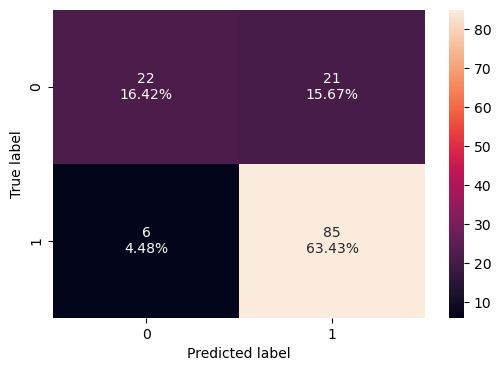

In [192]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [193]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.798507,0.934066,0.801887,0.862944


### Random Forest

In [195]:
# Fitting the model
rf_estimator = RandomForestClassifier() ## Complete the code to define random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(X_train,y_train) ## Complete the code to fit random forest on the train data

RandomForestClassifier()

#### Checking model performance on training set

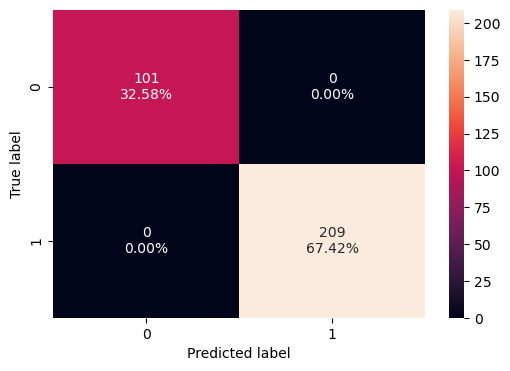

In [197]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [198]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train) ## Complete the code to check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

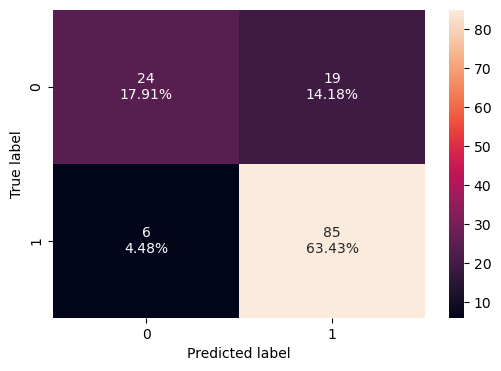

In [200]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [201]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator,X_test,y_test) ## Complete the code to check performance for test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.813433,0.934066,0.817308,0.871795


### Hyperparameter Tuning - Random Forest

In [203]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5,0.7,1],  # minimum two hyperparameters to be used for tuning
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=rf_tuned,param_grid=parameters,n_jobs=-1,cv=5) ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, max_samples=0.7, oob_score=True,
                       random_state=1)

#### Checking model performance on training set

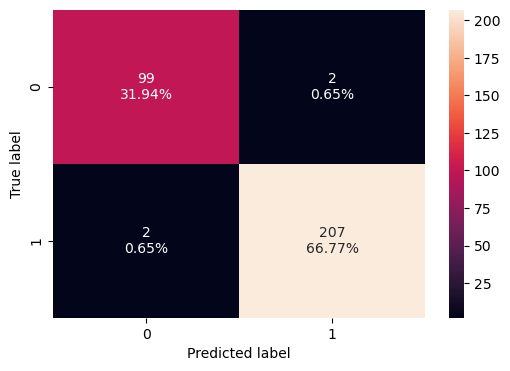

In [205]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [206]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.987097,0.990431,0.990431,0.990431


#### Checking model performance on test set

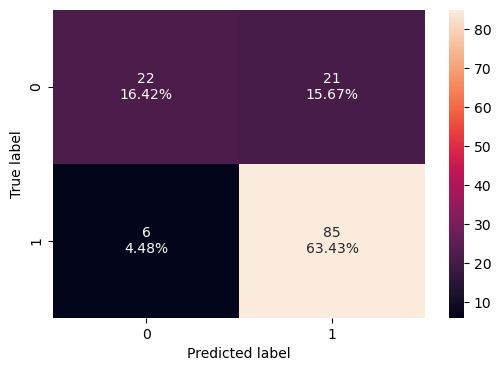

In [208]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [209]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.798507,0.934066,0.801887,0.862944


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [212]:
ab_classifier = AdaBoostClassifier(random_state=1) ## Complete the code to define AdaBoost Classifier with random state = 1
ab_classifier.fit(X_train,y_train) ## Complete the code to fit AdaBoost Classifier on the train data

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

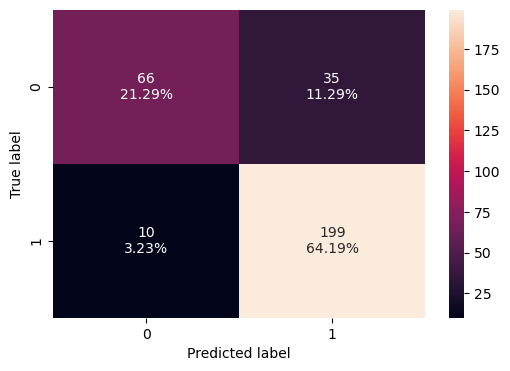

In [214]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [215]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train) ## Complete the code to check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.854839,0.952153,0.850427,0.89842


#### Checking model performance on test set

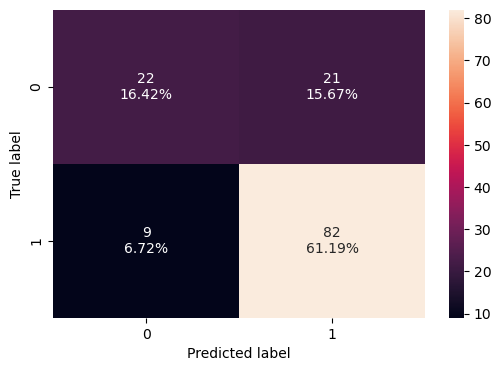

In [217]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [218]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test) ## Complete the code to check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.776119,0.901099,0.796117,0.845361


### Hyperparameter Tuning - AdaBoost Classifier

In [220]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'n_estimators':[10,50,250,1000],
    'learning_rate':[0.01,0.1]  # minimum two hyperparameters to be used for tuning
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=abc_tuned,param_grid=parameters,cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, random_state=1)

#### Checking model performance on training set

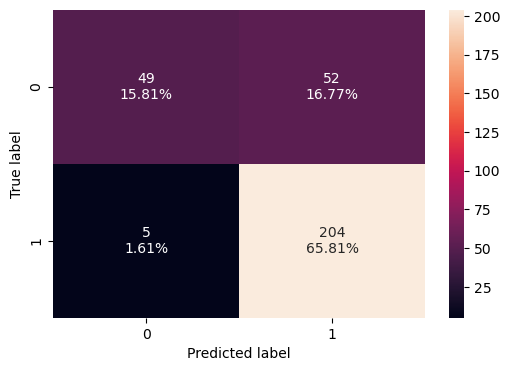

In [222]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [223]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.816129,0.976077,0.796875,0.877419


#### Checking model performance on test set

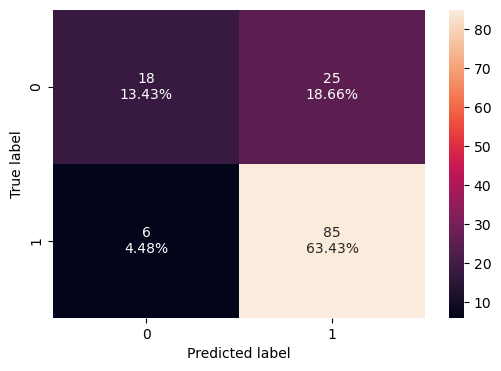

In [225]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [226]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.768657,0.934066,0.772727,0.845771


## Model Comparison and Final Model Selection

**Comparing all models**

In [227]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [

    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",

]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier
Accuracy,0.993548,0.974194,1.0,0.987097,0.854839,0.816129
Recall,0.990431,0.995215,1.0,0.990431,0.952153,0.976077
Precision,1.000000,0.967442,1.0,0.990431,0.850427,0.796875
F1,0.995192,0.981132,1.0,0.990431,0.898420,0.877419


In [228]:
# testing performance comparison

models_train_comp_df = pd.concat(
    [
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [

    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",

]
print("Training performance comparison:")
models_train_comp_df ## Complete the code to check performance for test data

Training performance comparison:


,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier
Accuracy,0.783582,0.798507,0.813433,0.798507,0.776119,0.768657
Recall,0.857143,0.934066,0.934066,0.934066,0.901099,0.934066
Precision,0.829787,0.801887,0.817308,0.801887,0.796117,0.772727
F1,0.843243,0.862944,0.871795,0.862944,0.845361,0.845771


### Important features of the final model

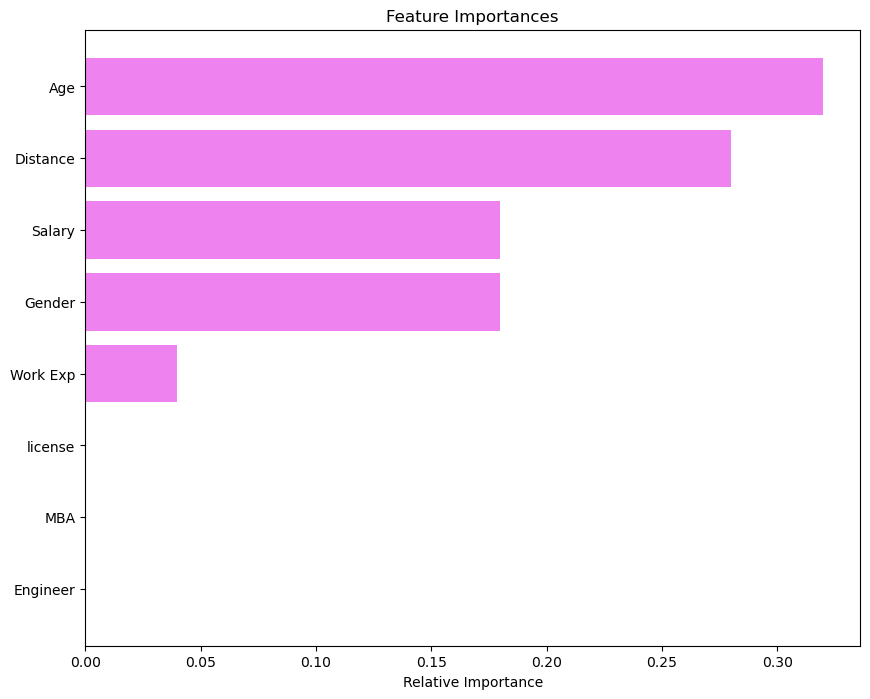

In [172]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_ # complete the code with the variable corresponding to the best model
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

-


___